In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV as GridSearch
from mpl_toolkits.mplot3d import Axes3D

In [2]:
cust_data = pd.read_excel('Online Retail.xlsx')

# Reviewing and Cleaning the Data

In [3]:
cust_data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# We cannot estimating the CustomerID. So we can drop it
cust_data.dropna(subset=['CustomerID'], inplace=True)

In [6]:
# Droping the duplicate rows
cust_data.drop_duplicates(inplace=True)
cust_data.reset_index(drop=True, inplace=True)

In [7]:
cust_data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [8]:
cust_data.info()
# There's no missing value anymore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [9]:
## If the InvoiceNo is starting with 'C', it means that customer cancels the order.
# So we can split up the completed transaction and canceled transaction
cancel_order_data = cust_data[cust_data['InvoiceNo'].str[0:1]=='C']

In [10]:
# Filtering the data with no cancel order
cust_data = cust_data[cust_data['InvoiceNo'].str[0:1]!='C']

# EDA

In [11]:
# Let explore the data
# Let see if there's any "freak" values on Quantity and Price

print(cust_data.Quantity.min())
print(cust_data.UnitPrice.min())

1
0.0


0 quantity and 0 unit price is wil not affect to the RFM calculation. So it's better if wi drop it, it's gonna be great to your computer, because we reduce the data (again) :)

In [12]:
cust_data = cust_data[cust_data['Quantity'] > 0]
cust_data = cust_data[cust_data['UnitPrice'] > 0]

In [13]:
# Changing InvoiceDate into datetime
# Make new column : date only ( month and year )

cust_data['InvoiceDate'] = pd.to_datetime(cust_data['InvoiceDate'])
cust_data['Date-Month-Year'] = cust_data['InvoiceDate'].dt.strftime('%d-%b-%Y')
cust_data['Month'] = cust_data['Date-Month-Year'].str[3:6]
cust_data['Hour'] = cust_data['InvoiceDate'].dt.hour
cust_data['Minute'] = cust_data['InvoiceDate'].dt.minute

In [14]:
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date-Month-Year,Month,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01-Dec-2010,Dec,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01-Dec-2010,Dec,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01-Dec-2010,Dec,8,26


In [15]:
# Adding new column : TotalAmount for each customer for each time

cust_data['Amount'] = cust_data['Quantity'] * cust_data['UnitPrice']

Let see when this comapany got the best selling

In [16]:
# The best selling ( Month )

month_selling = pd.DataFrame(data=cust_data.loc[:, ['Month', 'UnitPrice', 'Quantity']], columns=['Month', 'UnitPrice', 'Quantity'])
month_selling['Amount'] = month_selling['UnitPrice'] * month_selling['Quantity']

month = []
month_amount = []

for bulan in month_selling['Month'].unique():
    month.append(bulan)
    month_amount.append(month_selling.loc[month_selling.Month == bulan, 'Amount'].sum())

month_selling_data = pd.DataFrame(data={'Month': month, 'Amount': month_amount})
top_month_selling_data = month_selling_data.sort_values(by='Amount', ascending=False).reset_index(drop=True)

In [17]:
top_month_selling_data

,Month,Amount
0,Nov,1156205.610
1,Dec,1087613.170
2,Oct,1035642.450
3,Sep,950690.202
4,May,677355.150
5,Jun,660046.050
6,Aug,644051.040
7,Jul,598962.901
8,Mar,594081.760
9,Jan,568101.310


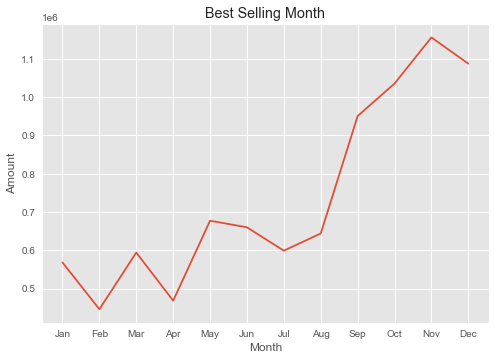

In [92]:
# Let's visualize it

fixing_index = [1,2,3,4,5,6,7,8,9,10,11,0]
_ = plt.style.use('ggplot')
_ = plt.plot(month_selling_data.reindex(fixing_index)['Month'], month_selling_data.reindex(fixing_index)['Amount'])
_ = plt.xlabel('Month')
_ = plt.ylabel('Amount')
_ = plt.title('Best Selling Month')
plt.show()

# Y tick is gotta be fixed

So month with the best selling is November..... 

In [19]:
# The best selling ( Hours )

hours_selling = pd.DataFrame(data=cust_data.loc[:, ['Hour', 'UnitPrice', 'Quantity']], columns=['Hour', 'UnitPrice', 'Quantity'])
hours_selling['Amount'] = hours_selling['UnitPrice'] * hours_selling['Quantity']

hours = []
hours_amount = []

for jam in hours_selling['Hour'].unique():
    hours.append(jam)
    hours_amount.append(hours_selling.loc[hours_selling.Hour == jam, 'Amount'].sum())

hours_selling_data = pd.DataFrame(data={'Hours': hours, 'Amount': hours_amount})
top_hours_selling_data = hours_selling_data.sort_values(by='Amount', ascending=False).reset_index(drop=True)

In [20]:
hours_selling_data = hours_selling_data.sort_values(by='Hours')
hours_selling_data

,Hours,Amount
14,6,4.250
10,7,31059.210
0,8,281997.790
1,9,842392.341
2,10,1259267.591
3,11,1101177.600
4,12,1373695.390
5,13,1168724.200
6,14,991992.821
7,15,963559.680


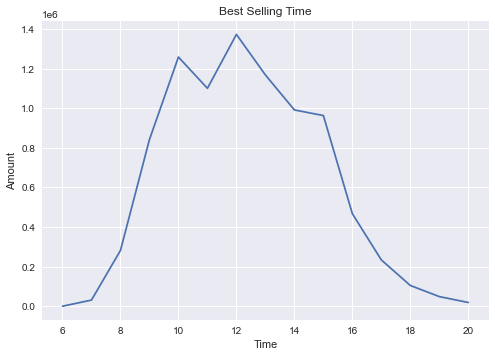

In [93]:
# Let's Visualize it

_ = plt.style.use('seaborn')
_ = plt.plot(hours_selling_data['Hours'], hours_selling_data['Amount'])
_ = plt.xlabel('Time')
_ = plt.ylabel('Amount')
_ = plt.title('Best Selling Time')
plt.show()

So time with the best selling is 12.00 a clock.....

# Count The RFM

* Recency = Latest Date - Last Invoice Data
* Frequency = Count of InvoiceNo of Transaction
* Monetary = Sum of Total Payment

In [22]:
latest_date = cust_data['InvoiceDate'].max()
latest_date = dt.datetime(2011,12,10)

In [56]:
# RFM Modelling or each customer (CustomerID)

RFM_scores = cust_data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (abs(latest_date - x.max())).days, 
                                                 'InvoiceNo': lambda x: abs(len(x)),
                                                  'Amount': lambda x: abs(x.sum())})

In [57]:
# Changing RFM_scores columns name to R and F and M

RFM_scores.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Amount':'Monetary'}, inplace=True)

In [58]:
# RFM Statistic Desriptive

RFM_scores.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,306.482500
50%,50.000000,41.000000,668.570000
75%,141.750000,98.000000,1660.597500
max,373.000000,7676.000000,280206.020000


C:\Users\AHNAF BASIL MUBAROK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

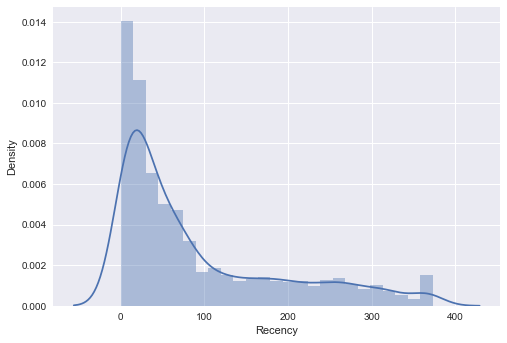

In [59]:
# Recency Plot

sns.distplot(RFM_scores.Recency)

C:\Users\AHNAF BASIL MUBAROK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

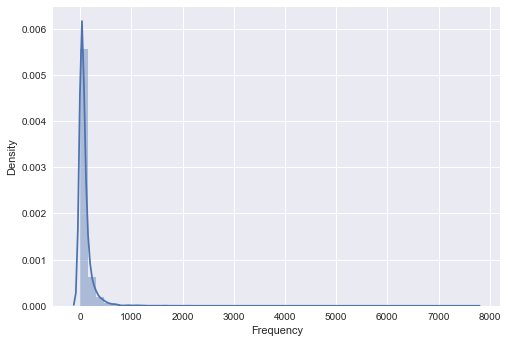

In [60]:
# Frequency Plot

sns.distplot(RFM_scores.Frequency)

C:\Users\AHNAF BASIL MUBAROK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

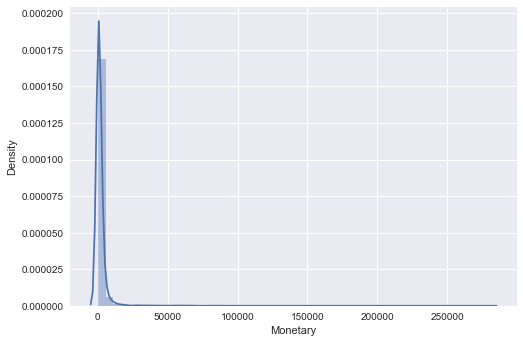

In [61]:
# Monetary plot

sns.distplot(RFM_scores.Monetary)

# Clustering Base on RFM

In [62]:
RFM_scores['Recency'] = RobustScaler().fit_transform(RFM_scores['Recency'].values.reshape(-1, 1))
RFM_scores['Frequency'] = RobustScaler().fit_transform(RFM_scores['Frequency'].values.reshape(-1, 1))
RFM_scores['Monetary'] = RobustScaler().fit_transform(RFM_scores['Monetary'].values.reshape(-1, 1))

Estimating the best number of cluster from grid search, validation curve, and  inerti curve

Text(0, 0.5, 'inertia sum squared error')

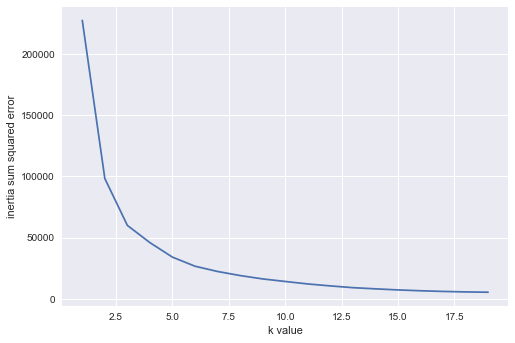

In [63]:
# Inertia Curve

k_1 = range(1,20)
inertia = []

for i in k_1:
    model = KMeans(n_clusters = i)
    model.fit(RFM_scores[['Recency', 'Frequency', 'Monetary']])
    inertia.append(model.inertia_)
    
# Plot it    
plt.plot(k_1, inertia) 
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')

# X axis scale / x tick gotta be fixed

In [64]:
# Grid search

param_grid = {'n_clusters' : range(1,20)}
grid = GridSearch(KMeans(), param_grid, cv=7)
grid.fit(RFM_scores[['Recency', 'Frequency', 'Monetary']])

model = grid.best_estimator_

In [65]:
# Let's cluster the customers
# n = 3 , based on Inertia curve

model = KMeans(n_clusters = 3, max_iter = 100)
model.fit(RFM_scores[['Recency', 'Frequency', 'Monetary']])


KMeans(max_iter=100, n_clusters=3)

In [73]:
RFM_scores['Clusters'] = model.predict(RFM_scores[['Recency', 'Frequency', 'Monetary']])
RFM_scores['Recency'] = abs(RFM_scores.Recency)
RFM_scores['Frequency'] = abs(RFM_scores.Frequency)
RFM_scores['Monetary'] = abs(RFM_scores.Monetary)

In [74]:
RFM_scores

,Recency,Frequency,Monetary,Clusters,color
CustomerID,,,,,
12346.0,2.204409,0.493827,56.505563,2,#2095DF
12347.0,0.384770,1.740741,2.689159,0,#DF2020
12348.0,0.200401,0.123457,0.833511,0,#DF2020
12349.0,0.256513,0.395062,0.804201,0,#DF2020
12350.0,2.084168,0.296296,0.246781,0,#DF2020
...,...,...,...,...,...
18280.0,1.819639,0.382716,0.360361,0,#DF2020
18281.0,1.042084,0.419753,0.434047,0,#DF2020
18282.0,0.344689,0.358025,0.362244,0,#DF2020


In [75]:
RFM_scores.Clusters.unique()

array([2, 0, 1])

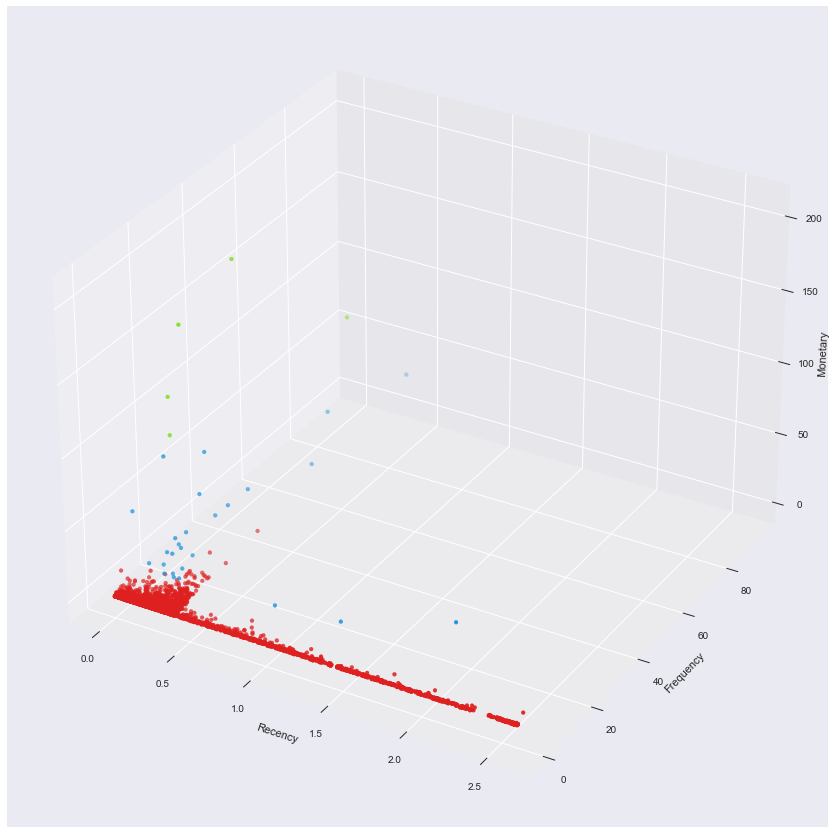

In [76]:
# Ploting the cluster
colors = ['#DF2020', '#81DF20', '#2095DF']
RFM_scores['color'] = RFM_scores.Clusters.map({0:colors[0], 1:colors[1], 2:colors[2]})

fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(RFM_scores.Recency, RFM_scores.Frequency, RFM_scores.Monetary, c=RFM_scores.color, s=15)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [77]:
RFM_scores.Clusters.value_counts()

0    4306
2      27
1       5
Name: Clusters, dtype: int64

In [87]:
cluster_0 = RFM_scores.loc[RFM_scores.Clusters==0,['Recency', 'Frequency', 'Monetary']]
cluster_1 = RFM_scores.loc[RFM_scores.Clusters==1,['Recency', 'Frequency', 'Monetary']]
cluster_2 = RFM_scores.loc[RFM_scores.Clusters==2,['Recency', 'Frequency', 'Monetary']]

In [89]:
cluster_0.describe()

,Recency,Frequency,Monetary
count,4306.000000,4306.000000,4306.000000
mean,0.584351,0.789610,0.850800
std,0.646340,1.434278,1.684118
min,0.000000,0.000000,0.000007
25%,0.176353,0.197531,0.191653
50%,0.320641,0.370370,0.341116
75%,0.737475,0.691358,0.703982
max,2.589178,32.543210,20.835653


In [90]:
cluster_1.describe()

,Recency,Frequency,Monetary
count,5.000000,5.000000,5.000000
mean,0.384770,20.708642,154.062975
std,0.027184,28.952579,43.305015
min,0.336673,0.469136,105.635489
25%,0.392786,3.641975,123.921476
50%,0.392786,4.814815,143.061867
75%,0.400802,25.123457,191.260513
max,0.400802,69.493827,206.435532


In [91]:
cluster_2.describe()

,Recency,Frequency,Monetary
count,27.000000,27.000000,27.000000
mean,0.477399,13.732053,40.904368
std,0.434759,22.453118,18.379422
min,0.096192,0.358025,20.433132
25%,0.324649,1.382716,26.935419
50%,0.376754,4.049383,37.558649
75%,0.392786,14.425926,47.583577
max,2.204409,94.259259,91.754364


# Conclusion
So there are 3 different clusters (cluster_0, cluster_1, and cluster_2). 
As we can see, the most widely customers are in cluster_0. Even tough cluster_0 has the smallest number of frequency and monetary and the biggest number of recency(wich is really bad), but most of company income come from this cluster. So, we can under estimate this cluster.
Cluster_1 and cluster_2 has better number of RFM tha cluster_0, but the sum of its customers are much less than cluster_0.

From this analysis, we can help Marketing Team to give a different 'treatment' for each clusters (segments).